In [20]:
import pandas as pd
import numpy as np
from numpy import *
import os
import pandas as pd
import tqdm
import sys
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.datasets import make_classification
%matplotlib inline

In [21]:
save_dir = os.path.join(os.getcwd(), 'NEPDF_data_3')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

def get_gene_list_bulk(file_name):
    """
    建立基因symbol到ensembl转换的字典
    file_name = './data/bulk_gene_list.txt'
    """
    import re
    h = {}
    s = open(file_name, 'r')  # gene symbol ID list of bulk RNA-seq
    for line in s:
        search_result = re.search(r'^([^\s]+)\s+([^\s]+)', line)
        h[search_result.group(1).lower()] = search_result.group(2)  # h [gene symbol] = gene ID
    s.close()
    return h


def get_gene_list(file_name):
    """
    建立基因symbol到一个id转换的字典
    file_name = './data/sc_gene_list.txt'
    """

    import re
    h = {}
    s = open(file_name, 'r')  # gene symbol ID list of sc RNA-seq
    for line in s:
        search_result = re.search(r'^([^\s]+)\s+([^\s]+)', line)
        h[search_result.group(1).lower()] = search_result.group(2)  # h [gene symbol] = gene ID
    s.close()
    return h

def get_sepration_index(file_name):
    import numpy as np
    index_list = []
    s = open(file_name, 'r')
    for line in s:
        index_list.append(int(line))
    return (np.array(index_list))

In [22]:
mode = '1'  # 0是单分类，1是多分类

###########################
# 建立基因symbol到ensembl转换的字典

# h_gene_list_bulk = get_gene_list_bulk(sys.argv[1])  # 'bulk_gene_list.txt')#
h_gene_list_bulk = get_gene_list_bulk('./data/bulk_gene_list.txt')  # 'bulk_gene_list.txt')#
print('read bulk gene list')

    
# h_gene_list = get_gene_list(sys.argv[2])  # 'sc_gene_list.txt')#
h_gene_list = get_gene_list('./data/sc_gene_list.txt')  # 'sc_gene_list.txt')#
print('read sc gene list')

store = pd.HDFStore('./data/mouse_bulk.h5')
rpkm_bulk = store['rpkm']
store.close()
print('read bulk RNA-seq expression')
rpkm_bulk

read bulk gene list
read sc gene list
read bulk RNA-seq expression


,ENSMUSG00000000001,ENSMUSG00000000003,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,...,ENSMUSG00000104518,ENSMUSG00000104519,ENSMUSG00000104520,ENSMUSG00000104521,ENSMUSG00000104522,ENSMUSG00000104523,ENSMUSG00000104524,ENSMUSG00000104525,ENSMUSG00000104526,ENSMUSG00000104527
1,98.09,0.0,17.44,508.80,2.65,1.10,29.60,17.46,29.87,19.86,...,0.0,0.03,0.00,0.0,0.0,4.69,0.43,0.01,0.0,0.0
2,70.62,0.0,0.93,1.04,0.97,0.40,6.11,166.12,39.71,13.42,...,0.0,0.10,0.00,0.0,0.0,0.00,0.02,0.00,0.0,0.0
3,9.72,0.0,1.31,0.89,0.10,0.12,26.96,3.86,5.48,25.22,...,0.0,0.08,0.10,0.0,0.0,0.46,0.58,1.92,0.0,0.0
4,5.26,0.0,0.00,333.47,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
5,10.16,0.0,4.11,0.97,0.21,0.00,16.49,31.01,5.53,13.69,...,0.0,0.07,0.00,0.0,0.0,0.00,0.00,0.06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,94.40,0.0,13.48,88.15,1.66,0.09,41.46,4.13,22.28,38.70,...,0.0,0.06,0.00,0.0,0.0,9.08,0.91,0.03,0.0,0.0
246,29.23,0.0,0.00,1127.23,0.00,42.59,7.21,0.00,0.00,146.76,...,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
247,45.10,0.0,13.86,0.05,0.00,0.06,62.70,0.00,5.94,24.11,...,0.0,0.00,0.05,0.0,0.0,1.00,0.24,1.23,0.0,0.0
248,93.01,0.0,31.50,244.73,2.74,2.08,25.99,49.54,20.83,19.69,...,0.0,0.20,0.15,0.0,0.0,3.50,0.30,0.02,0.0,0.0


In [23]:
store = pd.HDFStore('./data/rank_total_gene_rpkm.h5')  # '/home/yey3/sc_process_1/rank_total_gene_rpkm.h5')    # scRNA-seq expression data                        )#
rpkm = store['rpkm']
store.close()
print('read sc RNA-seq expression')
rpkm

read sc RNA-seq expression


,16334,19241,16333,67945,11461,14526,17105,14325,15874,14319,...,100039574,100040911,100041256,70009,258630,257872,74484,258751,100040786,100042428
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.193929e+01,0.000000e+00,0.000000e+00,3.147167e+02,0.000000e+00,1.356210e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000e+00,2.457819e+02,0.000000e+00,2.905689e+02,2.910863e+01,0.000000e+00,0.000000e+00,9.941909e+01,0.000000e+00,1.999327e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000e+00,9.406559e+02,0.000000e+00,5.083723e+03,8.434911e+02,0.000000e+00,0.000000e+00,5.218237e+02,0.000000e+00,3.279351e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000e+00,1.536235e+02,0.000000e+00,6.538218e+03,1.273584e+02,0.000000e+00,0.000000e+00,2.982764e+02,0.000000e+00,3.748978e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000e+00,0.000000e+00,0.000000e+00,7.472699e+03,5.444369e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.580846e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43257,0.000000e+00,5.205293e+02,0.000000e+00,1.869346e+03,7.449986e+01,0.000000e+00,1.096784e+02,2.720297e+02,0.000000e+00,2.119224e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43258,0.000000e+00,4.858365e+02,0.000000e+00,1.907954e+03,5.982620e+01,0.000000e+00,6.224225e+01,2.491531e+02,0.000000e+00,2.083351e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43259,0.000000e+00,4.489635e+02,0.000000e+00,1.794583e+03,6.731790e+01,0.000000e+00,6.560221e+01,2.580571e+02,0.000000e+00,1.971801e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43260,0.000000e+00,5.412184e+02,0.000000e+00,2.409926e+03,7.791660e+01,0.000000e+00,6.202283e+01,3.226542e+02,0.000000e+00,2.344477e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
gene_pair_label = []
# s = open(sys.argv[3])  # 'mmukegg_new_new_unique_rand_labelx.txt')#)   ### read the gene pair and label file
s = open('./data/mmukegg_new_new_unique_rand_labelx.txt')
for line in s:
    gene_pair_label.append(line)
# gene_pair_index = get_sepration_index(
#     sys.argv[4])  # 'mmukegg_new_new_unique_rand_labelx_num.npy')#sys.argv[6]) # read file speration index
gene_pair_index = get_sepration_index('./data/mmukegg_new_new_unique_rand_labelx_num.txt')
s.close()
gene_pair_label_array = array(gene_pair_label)
print(len(gene_pair_index)-1)
print(len(gene_pair_label_array)*2/3)

3057
61648.0


In [6]:
for i in tqdm.tqdm(range(len(gene_pair_index) - 1)):
    start_index = gene_pair_index[i]
    end_index = gene_pair_index[i+1]
    x = []
    y = []
    z = []
    for gene_pair in gene_pair_label_array[start_index:end_index]: ## each speration
        separation = gene_pair.split()
        x_gene_name,y_gene_name,label = separation[0],separation[1],separation[2]
        if label == '1' or label == '0':
            y.append(label)
            z.append(x_gene_name+'\t'+y_gene_name)

            x_tf_bulk = log10(rpkm_bulk[h_gene_list_bulk[x_gene_name]][0:249] + 10 ** -2)  ## 249 means the number of samples, users can just remove '[0:249]'
            x_gene_bulk = log10(rpkm_bulk[h_gene_list_bulk[y_gene_name]][0:249] + 10 ** -2)
            H_T_bulk = histogram2d(x_tf_bulk, x_gene_bulk, bins=32)
            H_bulk= H_T_bulk[0].T
            HT_bulk = (log10(H_bulk / 43261 + 10 ** -4) + 4)/4

            x_tf = log10(rpkm[int(h_gene_list[x_gene_name])][0:43261] + 10 ** -2) # ## 43261 means the number of samples in the sc data, we also have one row that is sum of all cells, so the real size is 43262, that is why we use [0:43261]. For TF target prediction or other data, just remove "[0:43261]"
            x_gene = log10(rpkm[int(h_gene_list[y_gene_name])][0:43261] + 10 ** -2)# For TF target prediction, remove "[0:43261]"
            H_T = histogram2d(x_tf, x_gene, bins=32)
            H = H_T[0].T
            HT = (log10(H / 43261 + 10 ** -4) + 4) / 4

            x.append(concatenate((HT, HT_bulk), axis=0))
        
    if (len(x)>0):
        xx = array(x)[:, :, :, newaxis]
    else:
        xx = array(x)
    save(save_dir+'/Nxdata_tf' + str(i) + '.npy', xx)
    save(save_dir+'/ydata_tf' + str(i) + '.npy', array(y))
    save(save_dir+'/zdata_tf' + str(i) + '.npy', array(z))

100%|██████████| 3057/3057 [06:16<00:00,  8.12it/s]


In [1]:
from __future__ import print_function
import keras
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
import os,sys
import tqdm
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import interp
import plotly.express as px
%matplotlib inline

In [2]:
data_path = './NEPDF_data_3'
# num_predictions = 20
batch_size = 1024  # mini batch for training
num_classes = 2   #### categories of labels
epochs = 300     #### iterations of trainning, with GPU 1080, 600 for KEGG and Reactome, 200 for tasks for GTRD
length_TF = 3057  # number of divide data parts
# num_predictions = 20
model_name = 'keras_cnn_trained_model_shallow.h5'

In [3]:
def load_data_TF2(indel_list,data_path): # cell type specific  ## random samples for reactome is not enough, need borrow some from keggp
    import random
    import numpy as np
    xxdata_list = []
    yydata = []
    count_set = [0]
    count_setx = 0
    for i in indel_list:#len(h_tf_sc)):
        xdata = np.load(data_path+'/Nxdata_tf' + str(i) + '.npy')
        ydata = np.load(data_path+'/ydata_tf' + str(i) + '.npy')
        for k in range(len(ydata)):
            xxdata_list.append(xdata[k,:,:,:])
            yydata.append(ydata[k])
        count_setx = count_setx + len(ydata)
        count_set.append(count_setx)
    yydata_array = np.array(yydata)
    yydata_x = yydata_array.astype('int')
    print(np.array(xxdata_list).shape)
    return((np.array(xxdata_list),yydata_x,count_set))

In [4]:
save_dir = os.path.join(os.getcwd(),'YYYY_saved_models_T_32-32-64-64-128-128-512_e'+str(epochs)) ## the result folder 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [5]:
whole_data_TF = [i for i in range(length_TF)]
test_indel = 2
test_TF = [i for i in range(int(np.ceil((test_indel-1)*0.333*length_TF)),int(np.ceil(test_indel*0.333*length_TF)))]         
train_TF = [i for i in whole_data_TF if i not in test_TF]                                                                    
(x_train, y_train, count_set_train) = load_data_TF2(train_TF,data_path)
(x_test, y_test, count_set) = load_data_TF2(test_TF,data_path)
if num_classes > 2:
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape, 'y_train samples')
print(y_test.shape, 'y_test samples')

(44730, 64, 32, 1)
(16918, 64, 32, 1)
(44730,) y_train samples
(16918,) y_test samples


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
if num_classes <2:
    print ('no enough categories')
    sys.exit()
elif num_classes == 2:
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])
else:
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=False, mode='auto')
checkpoint1 = ModelCheckpoint(filepath=save_dir + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss',
                              verbose=False, save_best_only=False, save_weights_only=False, mode='auto', period=1)
checkpoint2 = ModelCheckpoint(filepath=save_dir + '/weights.hdf5', monitor='val_accuracy', verbose=False,
                              save_best_only=True, mode='auto', period=1)
callbacks_list = [checkpoint2, early_stopping]
print('Not using data augmentation.')

Not using data augmentation.


In [8]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,validation_split=0.2,
          shuffle=True, callbacks=callbacks_list)

Epoch 1/300
35/35 [==============================] - 3s 96ms/step - loss: 0.6927 - accuracy: 0.5435 - val_loss: 0.6918 - val_accuracy: 0.5627
Epoch 2/300
35/35 [==============================] - 2s 54ms/step - loss: 0.6909 - accuracy: 0.5623 - val_loss: 0.6900 - val_accuracy: 0.5658
Epoch 3/300
35/35 [==============================] - 2s 49ms/step - loss: 0.6887 - accuracy: 0.5710 - val_loss: 0.6869 - val_accuracy: 0.5649
Epoch 4/300
35/35 [==============================] - 2s 53ms/step - loss: 0.6851 - accuracy: 0.5696 - val_loss: 0.6816 - val_accuracy: 0.5660
Epoch 5/300
35/35 [==============================] - 2s 51ms/step - loss: 0.6802 - accuracy: 0.5702 - val_loss: 0.6767 - val_accuracy: 0.5661
Epoch 6/300
35/35 [==============================] - 2s 50ms/step - loss: 0.6777 - accuracy: 0.5683 - val_loss: 0.6747 - val_accuracy: 0.5656
Epoch 7/300
35/35 [==============================] - 2s 54ms/step - loss: 0.6760 - accuracy: 0.5683 - val_loss: 0.6732 - val_accuracy: 0.5665
Epoch 

In [9]:
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
y_predict = model.predict(x_test)
np.save(save_dir+'/end_y_test.npy',y_test)
np.save(save_dir+'/end_y_predict.npy',y_predict)

Saved trained model at /GPUFS/sysu_jjzhang_1/xiongjh/YYYY_saved_models_T_32-32-64-64-128-128-512_e300/keras_cnn_trained_model_shallow.h5 
529/529 [==============================] - 2s 4ms/step - loss: 0.5508 - accuracy: 0.7218
Test loss: 0.5508469939231873
Test accuracy: 0.7218347191810608


In [35]:
a = (y_predict>0.5).astype('int').flatten()

          0         1
0  0.806597  0.193403
1  0.362927  0.637073


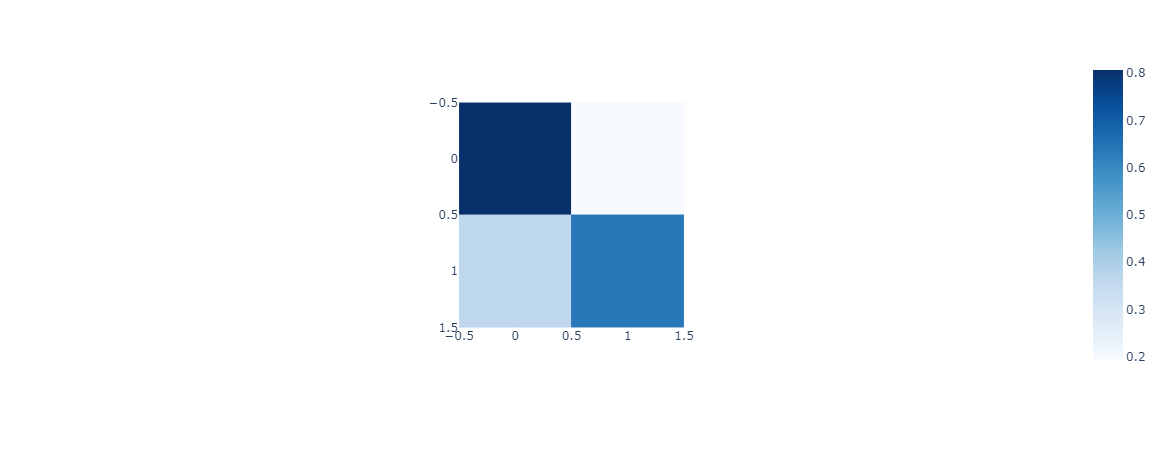

In [36]:
from sklearn.metrics import confusion_matrix
aaa = confusion_matrix(y_test, a)
bbb = aaa/aaa.sum(axis=1)
print(pd.DataFrame(bbb))
fig = px.imshow(bbb, color_continuous_scale='blues')
fig.show()

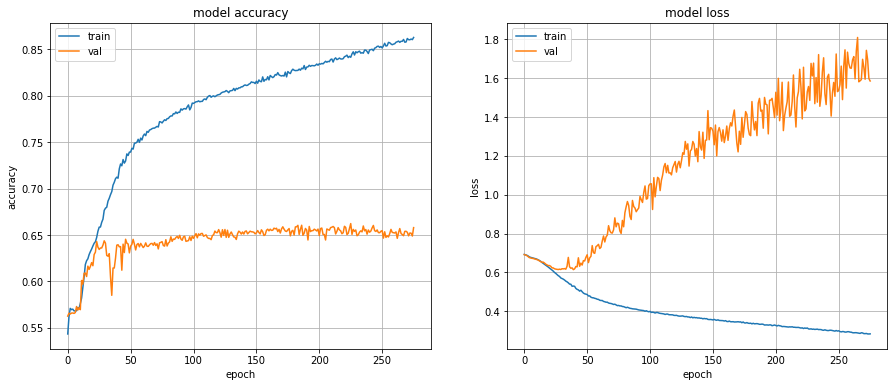

In [15]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

AUC: 0.8354603104163094


Text(0.5, 1.0, 'AUC:0.8354603104163094')

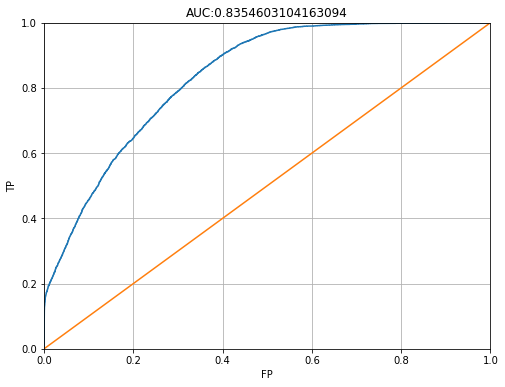

In [14]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
plt.plot(fpr, tpr)
plt.grid()
plt.plot([0, 1], [0, 1])
plt.xlabel('FP')
plt.ylabel('TP')
plt.ylim([0, 1])
plt.xlim([0, 1])
auc = np.trapz(tpr, fpr)
print('AUC:', auc)
plt.title('AUC:' + str(auc))

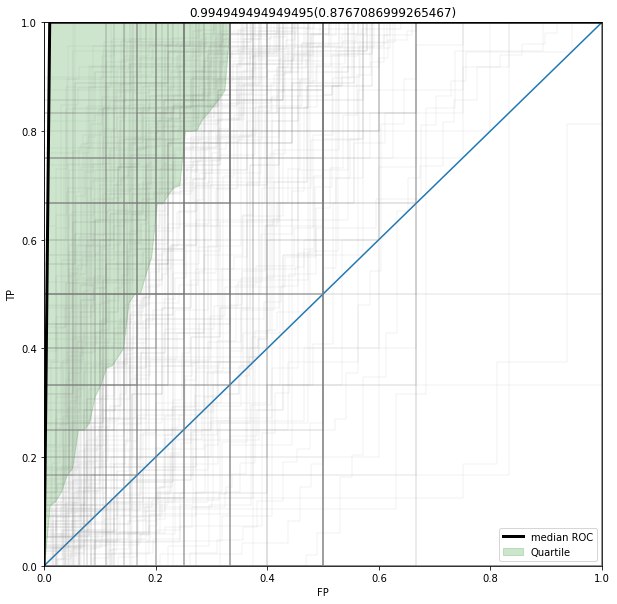

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1])
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xlabel('FP')
plt.ylabel('TP')
# plt.grid()
AUC_set = []
y_testy = y_test
y_predicty = y_predict
tprs = []
mean_fpr = np.linspace(0, 1, 100)
s = open(save_dir + '/divided_AUCs1vs2.txt', 'w')
for jj in range(len(count_set) - 1):  # len(count_set)-1):
    if count_set[jj] < count_set[jj + 1]:
        y_test_aaa = y_testy[count_set[jj]:count_set[jj + 1]]
        y_predict_aaa = y_predicty[count_set[jj]:count_set[jj + 1]]
        fpr, tpr, thresholds = metrics.roc_curve(y_test_aaa, y_predict_aaa, pos_label=1)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        plt.plot(fpr, tpr, color='0.5', lw=0.1)
        auc = np.trapz(tpr, fpr)
        s.write(str(jj) + '\t' + str(count_set[jj]) + '\t' + str(count_set[jj + 1]) + '\t' + str(auc) + '\n')
        AUC_set.append(auc)
median_tpr = np.median(tprs, axis=0)
mean_tpr = np.mean(tprs, axis=0)
median_tpr[-1] = 1.0
mean_tpr[-1] = 1.0
per_tpr = np.percentile(tprs, [25, 50, 75], axis=0)
median_auc = np.trapz(median_tpr, mean_fpr)
mean_auc = np.trapz(mean_tpr, mean_fpr)
plt.plot(mean_fpr, median_tpr, 'k', lw=3, label='median ROC')
plt.title(f'{str(median_auc)}({str(mean_auc)})')
plt.fill_between(mean_fpr, per_tpr[0, :], per_tpr[2, :], color='g', alpha=.2, label='Quartile')
plt.legend(loc='lower right')

In [27]:
gene_list = [['vim', 'zeb1'], ['vim', 'snai2'], ['vim', 'myc'], ['arid1a', 'zic1'], ['arid1a', 'sox1'], ['arid1a', 'map2']]
x = []
for (x_gene_name, y_gene_name) in gene_list:
    x_tf_bulk = np.log10(rpkm_bulk[h_gene_list_bulk[x_gene_name]][0:249] + 10 ** -2)  ## 249 means the number of samples, users can just remove '[0:249]'
    x_gene_bulk = np.log10(rpkm_bulk[h_gene_list_bulk[y_gene_name]][0:249] + 10 ** -2)
    H_T_bulk = histogram2d(x_tf_bulk, x_gene_bulk, bins=32)
    H_bulk= H_T_bulk[0].T
    HT_bulk = (np.log10(H_bulk / 43261 + 10 ** -4) + 4)/4

    x_tf = np.log10(rpkm[int(h_gene_list[x_gene_name])][0:43261] + 10 ** -2) # ## 43261 means the number of samples in the sc data, we also have one row that is sum of all cells, so the real size is 43262, that is why we use [0:43261]. For TF target prediction or other data, just remove "[0:43261]"
    x_gene = np.log10(rpkm[int(h_gene_list[y_gene_name])][0:43261] + 10 ** -2)# For TF target prediction, remove "[0:43261]"
    H_T = histogram2d(x_tf, x_gene, bins=32)
    H = H_T[0].T
    HT = (log10(H / 43261 + 10 ** -4) + 4) / 4
    
    x.append(concatenate((HT, HT_bulk), axis=0))
    xx = array(x)[:, :, :, newaxis]


In [32]:
model.predict(xx)

array([[0.26803064],
       [0.2627669 ],
       [0.544077  ],
       [0.3435143 ],
       [0.40076703],
       [0.34280127]], dtype=float32)